# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [4]:
data = pd.read_csv('used_car.csv')
data

,car name,brand,year,mileage (km),location,transmission,plate type,rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,360 camera view,power sliding door,auto cruise control,price (Rp),instalment (Rp|Monthly)
0,AYLA X 1.2,Daihatsu,2018,10.508,Jakarta Utara,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,101000000,2060000
1,AGYA TRD SPORTIVO 1.0,Toyota,2015,112.888,Bogor,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,82000000,1670000
2,X-TRAIL 2.5,Nissan,2015,118.429,Surabaya,Automatic,odd plate,0,0,0,0,0,0,1,0,1,0,0,169000000,3440000
3,YARIS S TRD 1.5,Toyota,2020,15.945,Tangerang Selatan,Automatic,odd plate,0,0,0,0,0,0,0,0,0,0,0,218000000,4440000
4,AGYA G 1.2,Toyota,2019,30.404,Jakarta Barat,Manual,odd plate,0,0,0,0,0,0,0,0,0,0,0,117000000,2380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,RAIZE GR SPORT TSS 1.0,Toyota,2021,32.288,Bogor,Automatic,odd plate,0,0,1,0,0,0,0,0,0,0,0,234000000,4770000
605,AGYA G TRD 1.2,Toyota,2019,26.474,Jakarta Utara,Automatic,odd plate,0,0,0,0,0,0,0,0,0,0,0,136000000,2770000
606,STARGAZER PRIME 1.5,Hyundai,2022,2.651,Bogor,Automatic,even plate,0,0,1,0,0,0,0,0,0,0,0,246000000,5010000
607,CALYA G 1.2,Toyota,2017,34.349,Jakarta Utara,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,116000000,2360000


### Statistical Summary of Data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,609.0,2.018049e+03,2.029601e+00,2.010000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2023.0
mileage (km),609.0,6.168579e+01,3.214993e+01,1.065000e+00,3.914500e+01,5.836500e+01,8.172600e+01,245.0
rear camera,609.0,1.428571e-01,3.502148e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
sun roof,609.0,2.955665e-02,1.694999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
auto retract mirror,609.0,4.696223e-01,4.994866e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0
electric parking brake,609.0,3.119869e-02,1.739972e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
map navigator,609.0,9.852217e-03,9.884936e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
vehicle stability control,609.0,1.034483e-01,3.047938e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
keyless push start,609.0,8.866995e-02,2.845004e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
sports mode,609.0,1.395731e-01,3.468284e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0


### NULL And Data Types

In [6]:
data.isnull().sum()

car name                     0
brand                        0
year                         0
mileage (km)                 0
location                     0
transmission                 0
plate type                   0
rear camera                  0
sun roof                     0
auto retract mirror          0
electric parking brake       0
map navigator                0
vehicle stability control    0
keyless push start           0
sports mode                  0
360 camera view              0
power sliding door           0
auto cruise control          0
price (Rp)                   0
instalment (Rp|Monthly)      0
dtype: int64

# Exploratory Data Analysis (EDA)

## Relationship between Features

### Price (Rp)

c:\Users\Jov L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


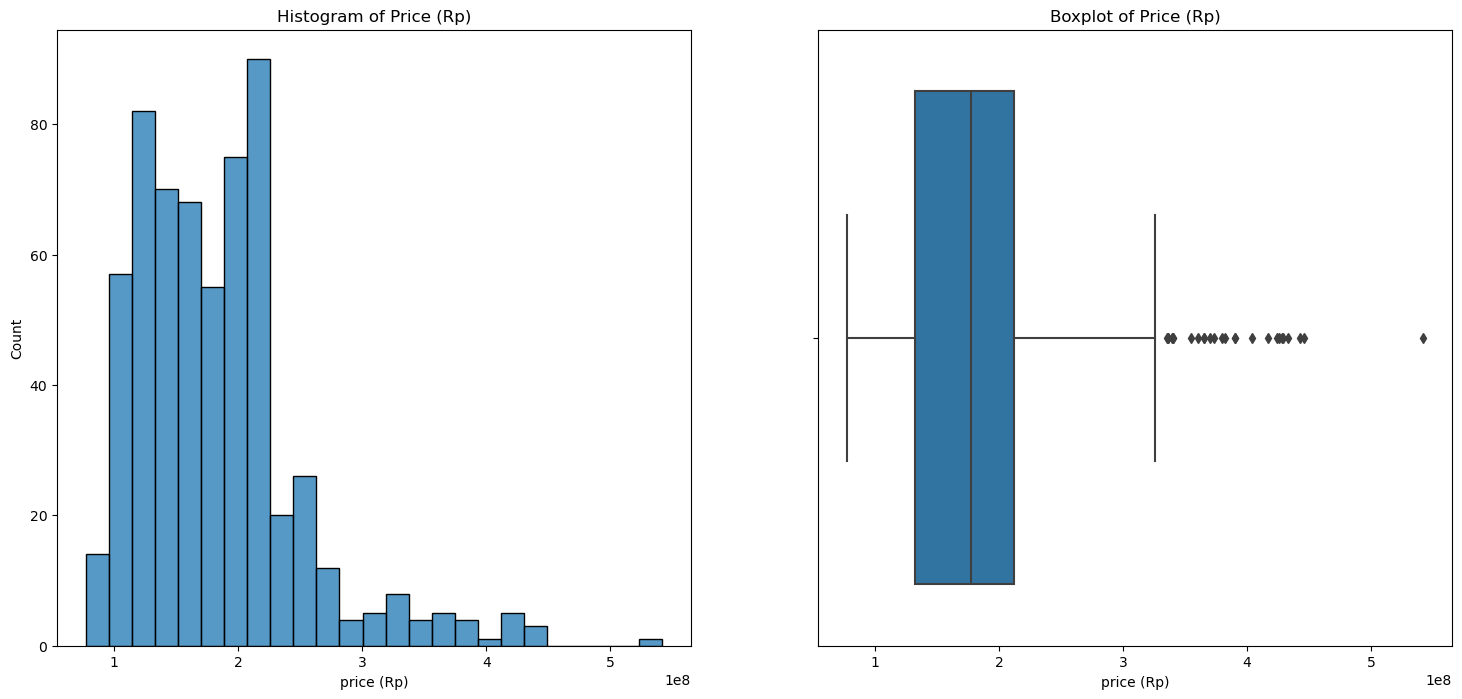

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'price (Rp)', ax = ax[0])
ax[0].set_title('Histogram of Price (Rp)')
ax[1].set_title('Boxplot of Price (Rp)')
sns.boxplot(data = data, x = 'price (Rp)')
plt.show()

Based on graph, we could see that the price is still have an outlier, thus the distribution is not categorized as Normal Distribution.

### Car Name

In [8]:
# plt.figure(figsize = (20, 38))
# sns.barplot(data = data, y = 'car name', x = 'price (Rp)', hue = 'car name')
# plt.show()

Based on graph, we cannot 

### Brand

In [9]:
data['brand'].value_counts()


brand
Toyota        171
Honda         145
Daihatsu       82
Mitsubishi     63
Suzuki         62
Nissan         33
Wuling         24
Mazda          19
Datsun          4
Hyundai         3
Chevrolet       1
Ford            1
BMW             1
Name: count, dtype: int64

In [10]:
# fig, ax = plt.subplots(1, 2, figsize = (20, 8))
# sns.countplot(data = data, x = 'brand', ax = ax[0])
# sns.barplot(data = data, y = 'brand', x = 'price (Rp)')
# plt.title('Brand vs Price')
# plt.show()

In [11]:
data = data[~data['brand'].isin(['BMW', 'Chevrolet', 'Ford'])]

Brand also play significant role, as some brand have a higher price than others

### Year

In [12]:
# fig, ax = plt.subplots(1, 2, figsize = (18, 8))
# data['year'].value_counts().plot(kind = 'bar', ax = ax[0])
# ax[0].set_title('Year distribution')
# sns.pointplot(data = data, x = 'year', y = 'price (Rp)')
# ax[1].set_title('Year vs Price')
# plt.show()

From the graph we can see that year play significant role for price, as the older car is, the lower the price untill 2023 model

### Mileage(Km)

In [13]:
# fig, ax = plt.subplots(1, 2, figsize = (18, 8))
# sns.histplot(data = data, x = 'mileage (km)', ax = ax[0])
# ax[0].set_title('mileage distribution')
# sns.scatterplot(data = data, x = 'mileage (km)', y = 'price (Rp)')
# ax[1].set_title('Mileage vs Prices')
# plt.show()

Based on the graph, milage doesnt play significant rule, as there is no pattern we can look at the data, and the mileage performs a normal distribution

### Location

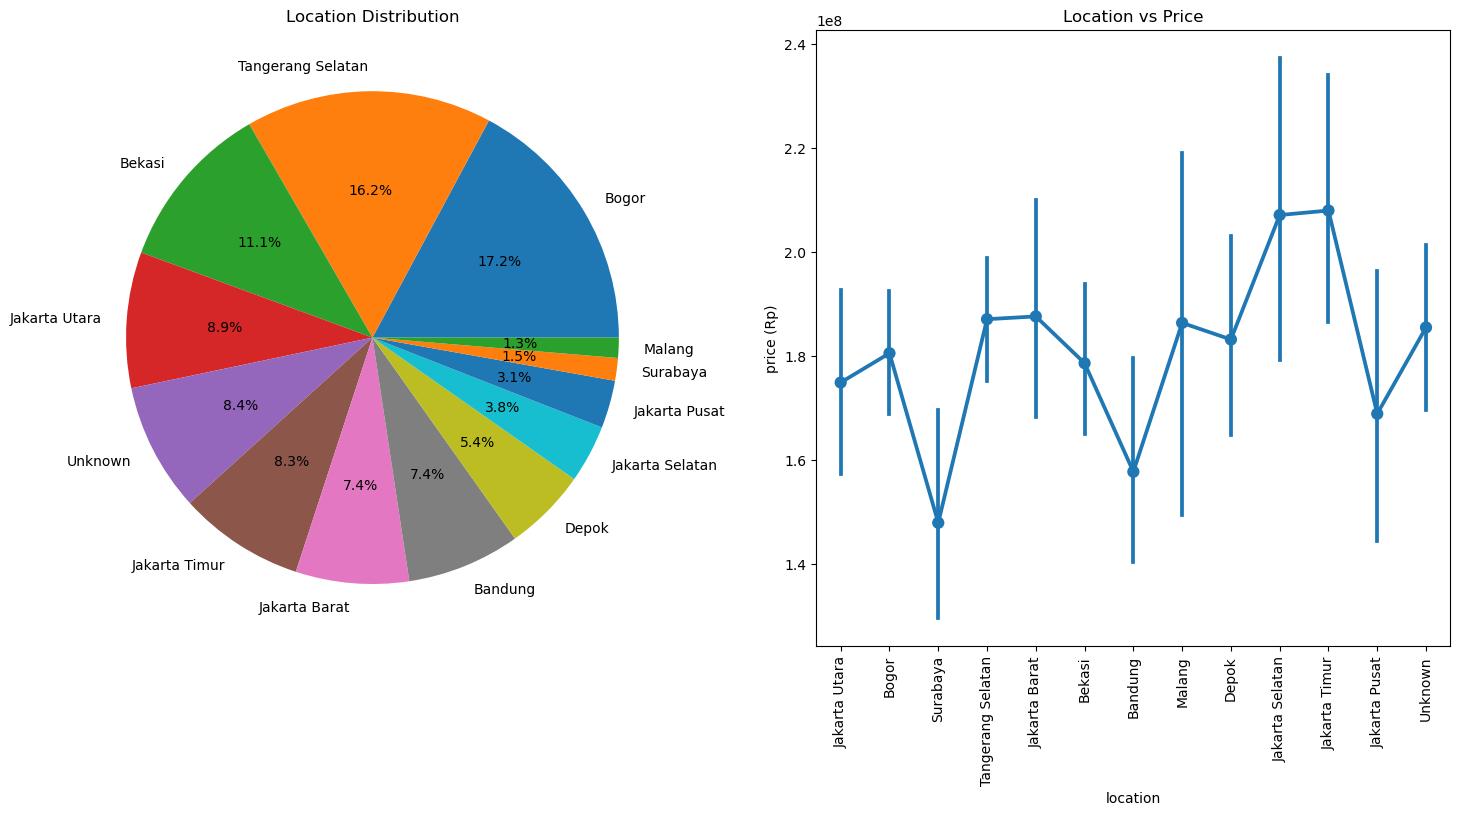

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['location'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('Location Distribution')
ax[0].set_ylabel('')
ax[1].set_title('Location vs Price')
sns.pointplot(data = data, x = 'location', y = 'price (Rp)')
plt.xticks(rotation = 90)
plt.show()

Based on graph, we could see that location also determines the car price, where as we can see that some location has higher price than others

### Transmission

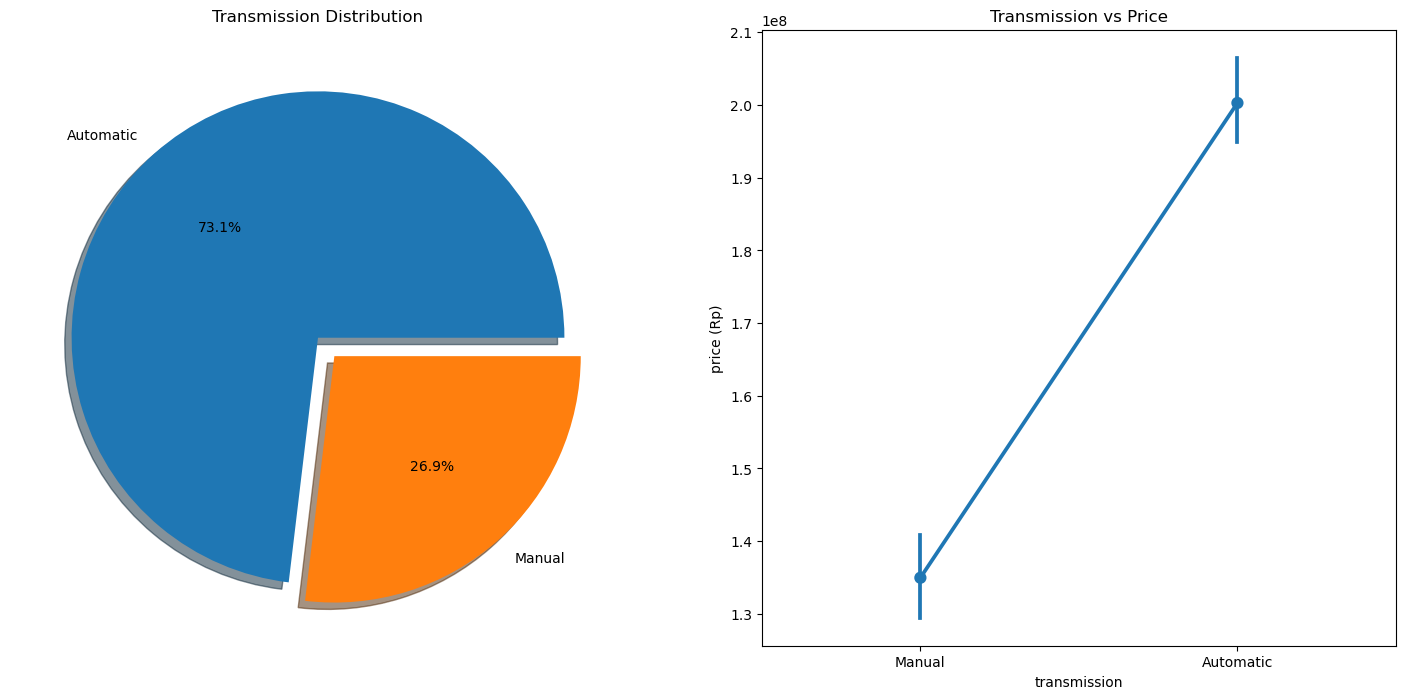

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['transmission'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_title('Transmission Distribution')
ax[0].set_ylabel('')
ax[1].set_title('Transmission vs Price')
sns.pointplot(data = data, x = 'transmission', y = 'price (Rp)')
plt.show()

We can see that the graph is significantly a bit imbalance as Automatic > Manual, in addition car with Manual transmission has a lower price than Automatic transmission

### Plate Type

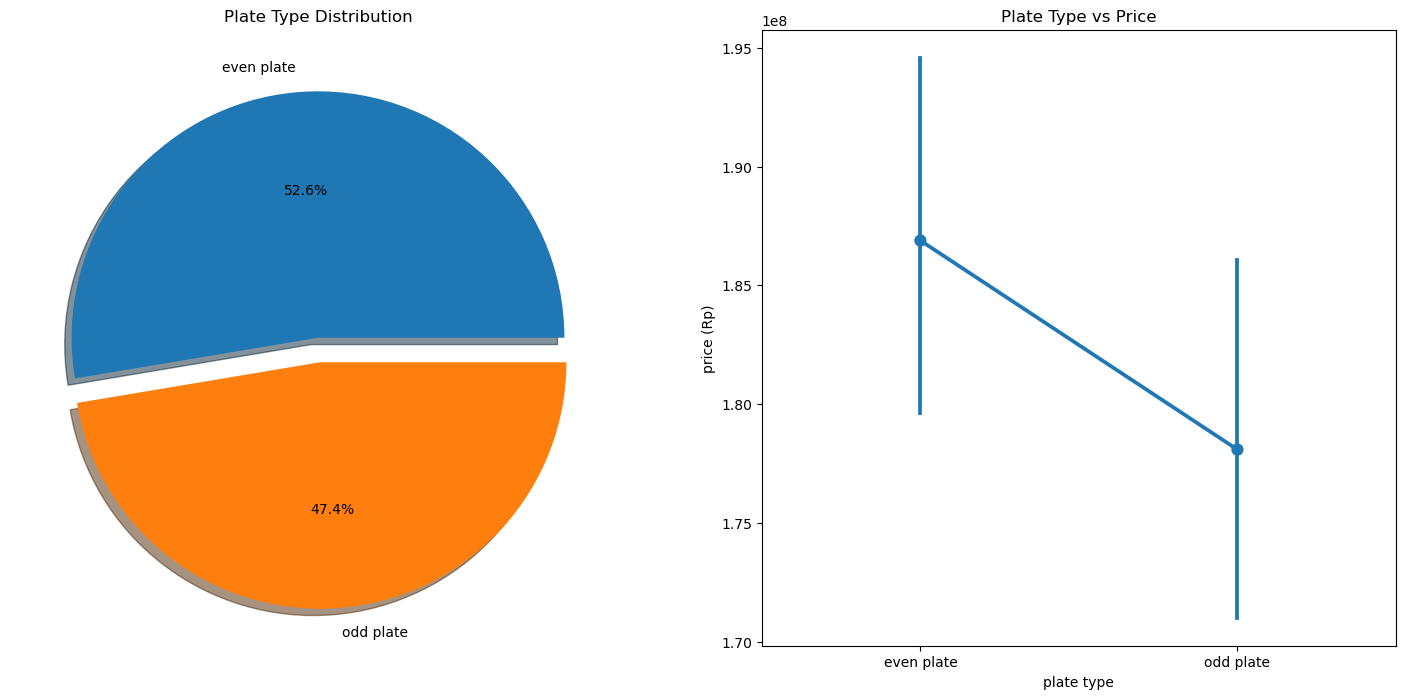

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['plate type'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_title('Plate Type Distribution')
ax[0].set_ylabel('')
ax[1].set_title('Plate Type vs Price')
sns.pointplot(data = data, x = 'plate type', y = 'price (Rp)')
plt.show()

### Car Features

In [17]:
# features = ['rear camera', 'sun roof', 'auto retract mirror', 'electric parking brake',
#             'map navigator', 'vehicle stability control', 'keyless push start',
#             'sports mode', '360 camera view', 'power sliding door', 'auto cruise control']
# fig, axes = plt.subplots(len(features), 2, figsize=(18, 8*len(features)))
# for i, feature in enumerate(features):
#     # Plot feature distribution as pie chart
#     data[feature].value_counts().plot(kind='pie', ax=axes[i, 0], autopct='%1.1f%%', explode=[0, 0.1], shadow=True)
#     axes[i, 0].set_title(f'{feature.capitalize()} Distribution')
#     axes[i, 0].set_ylabel('')
    
#     sns.pointplot(data=data, x=feature, y='price (Rp)', ax=axes[i, 1])
#     axes[i, 1].set_title(f'{feature.capitalize()} vs Price')

# plt.tight_layout()
# plt.show()

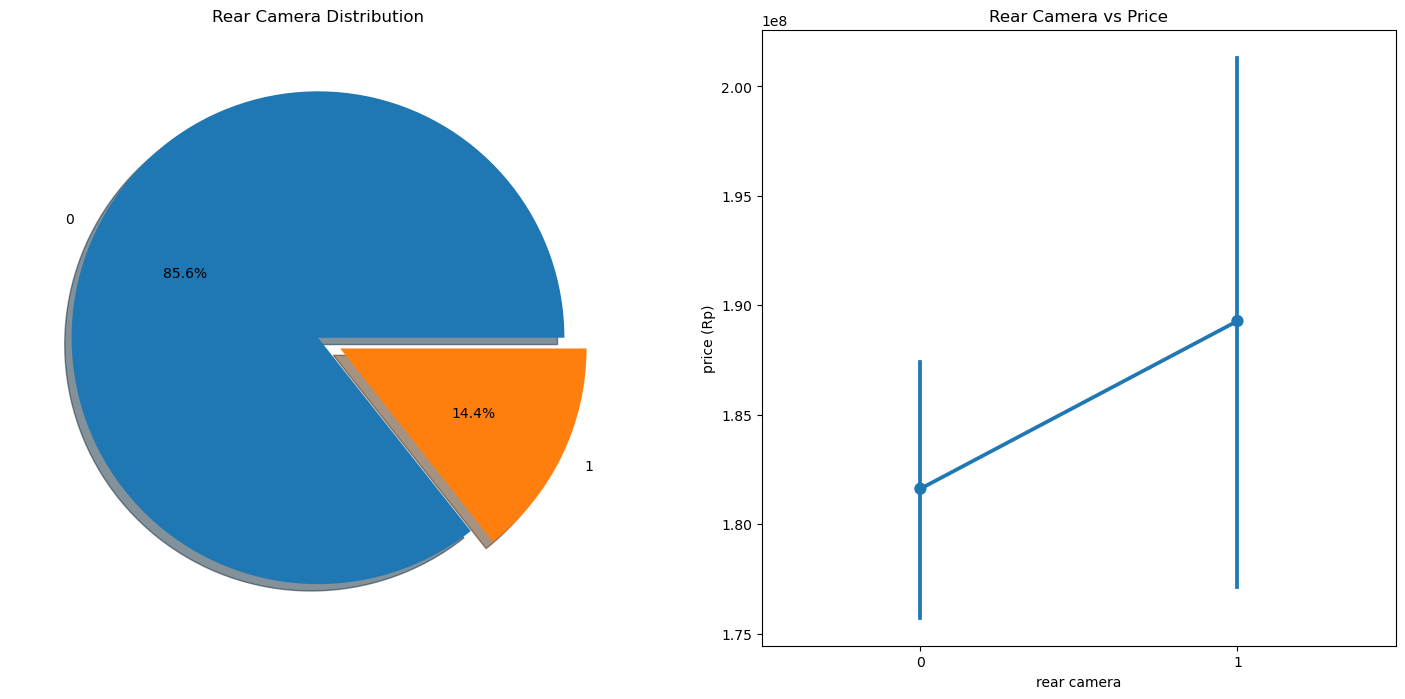

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['rear camera'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_title('Rear Camera Distribution')
ax[0].set_ylabel('')
ax[1].set_title('Rear Camera vs Price')
sns.pointplot(data = data, x = 'rear camera', y = 'price (Rp)')
plt.show()

For all car features, we can see that a modern car that has a new features are mostly has a higher price, as the car itself provide more comfort to the people who drive the car, hence the price is mostly higher for car with addition features

### Installment

c:\Users\Jov L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


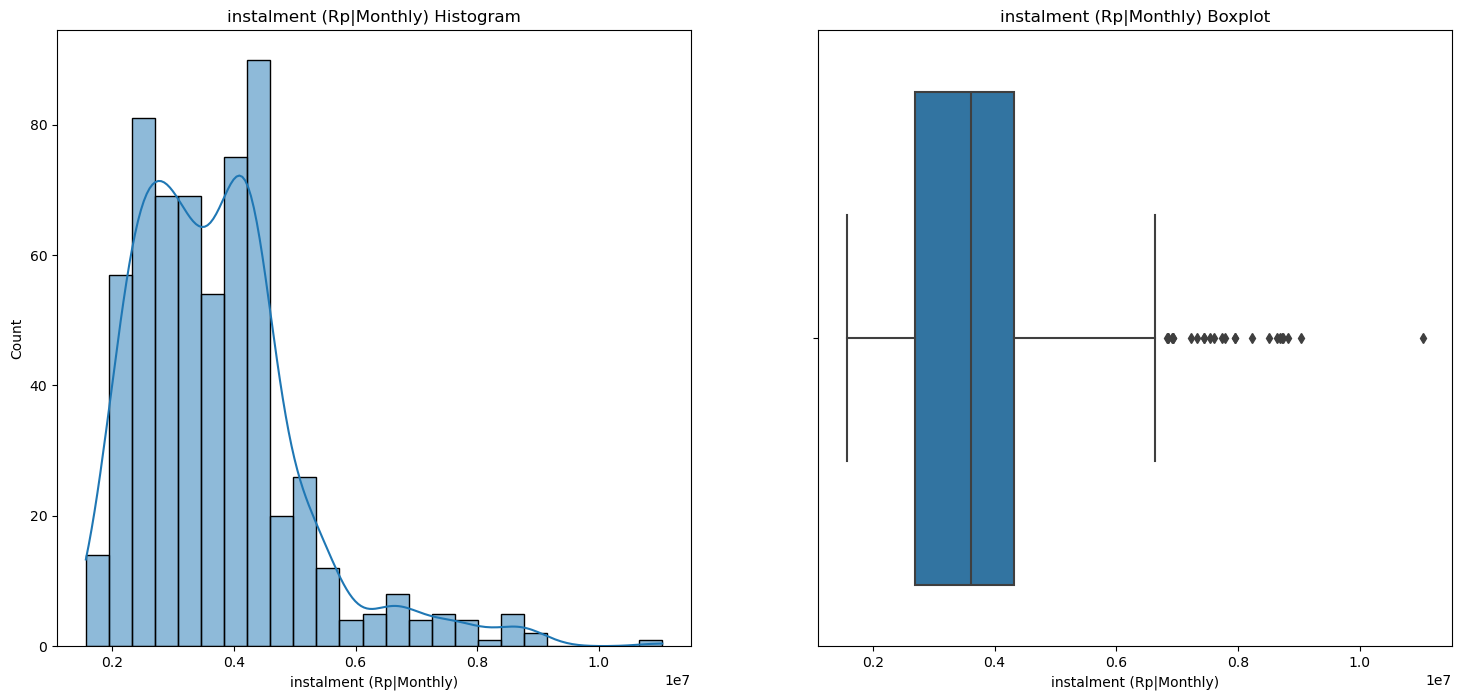

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'instalment (Rp|Monthly)', ax= ax[0], kde = True)
sns.boxplot(data = data, x = 'instalment (Rp|Monthly)')
ax[0].set_title('instalment (Rp|Monthly) Histogram')
ax[1].set_title('instalment (Rp|Monthly) Boxplot')
plt.show()

Here we can see that instalment (Rp|Monthly) does not perform normal distribution, as it still contains many outliers that affect the distribution

## Correlation

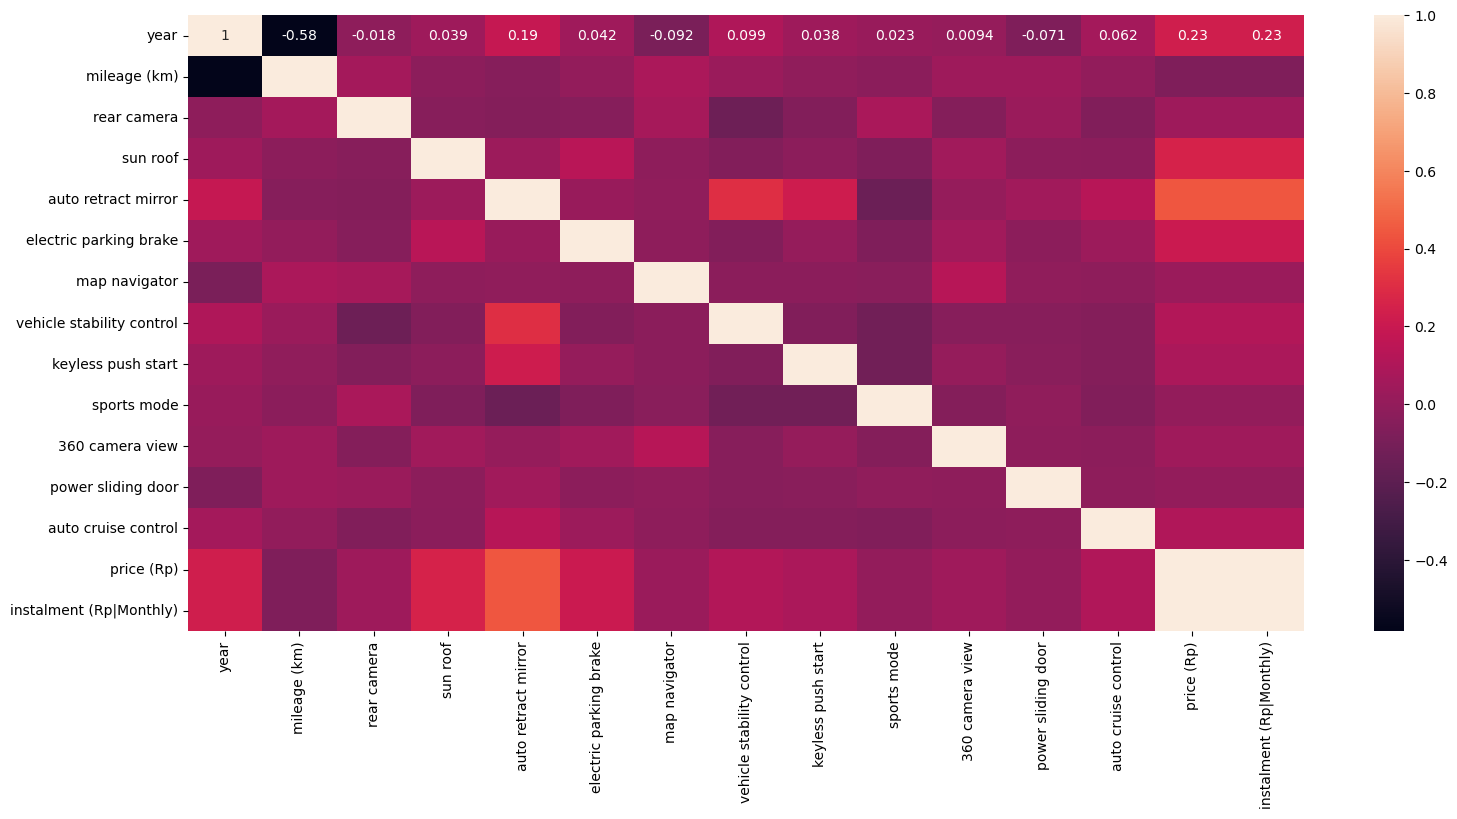

In [20]:
plt.figure(figsize = (18, 8))
numerical = data.select_dtypes(include = 'number')
sns.heatmap(data = numerical.corr(), annot = True)
plt.show()

# Data Preprocessing

In [21]:
data = data.drop(columns='instalment (Rp|Monthly)')

## Splitting Feature and Target

In [22]:
X = data.drop(columns=['price (Rp)', 'car name'])
y = data['price (Rp)']

## Handling Imbalance Dataset

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
oversampler = RandomOverSampler()
undersample = RandomUnderSampler()

X, y = oversampler.fit_resample(X, y)
X, y = undersample.fit_resample(X, y)

## Encoding Categorical Variable

In [24]:
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X

,year,mileage (km),rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,360 camera view,power sliding door,auto cruise control,brand_Datsun,brand_Honda,brand_Hyundai,brand_Mazda,brand_Mitsubishi,brand_Nissan,brand_Suzuki,brand_Toyota,brand_Wuling,location_Bekasi,location_Bogor,location_Depok,location_Jakarta Barat,location_Jakarta Pusat,location_Jakarta Selatan,location_Jakarta Timur,location_Jakarta Utara,location_Malang,location_Surabaya,location_Tangerang Selatan,location_Unknown,transmission_Manual,plate type_odd plate
219,2017.0,46.497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
606,2017.0,46.497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
607,2017.0,46.497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
608,2017.0,46.497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
609,2017.0,46.497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2022.0,15.713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2227,2022.0,15.713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2231,2022.0,15.713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2230,2022.0,15.713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Splitting Train and Test Set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0, 1, 13]] = sc.fit_transform(X_train.iloc[:, [0, 1, 13]])
X_test.iloc[:, [0, 1, 13]] = sc.transform(X_test.iloc[:, [0, 1, 13]])

# Modeling

In [27]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
pred_df = pd.DataFrame([])
def modeling(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('Model Accuracy: ', r2_score(y_test, pred))
    score = cross_val_score(model, X_train, y_train, cv = 10)
    print('Cross Validation Score (10 cv): ', score.mean())
    global pred_df
    pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    

## Linear Regresssion

In [28]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
modeling(linear)
pred_df

Model Accuracy:  0.5584261762008149
Cross Validation Score (10 cv):  0.5818111901825928


,Actual Value,Predicted Value,Difference
730,96000000,111087203.41,-15087203.41
405,141000000,114380609.83,26619390.17
644,84000000,73774694.12,10225305.88
551,210000000,243104651.72,-33104651.72
892,115000000,167344451.93,-52344451.93
...,...,...,...
77,168000000,123255815.36,44744184.64
1237,168000000,166914972.49,1085027.51
59,110000000,59291705.43,50708294.57
1641,228000000,306425558.67,-78425558.67


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10)
modeling(forest)
pred_df

Model Accuracy:  0.9434315169547625
Cross Validation Score (10 cv):  0.9668963840759371


,Actual Value,Predicted Value,Difference
730,96000000,96400000.00,-400000.00
405,141000000,197600000.00,-56600000.00
644,84000000,84000000.00,0.00
551,210000000,205700000.00,4300000.00
892,115000000,115000000.00,0.00
...,...,...,...
77,168000000,208500000.00,-40500000.00
1237,168000000,168000000.00,0.00
59,110000000,118900000.00,-8900000.00
1641,228000000,228000000.00,0.00


### XGBOOST

In [30]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=10)
modeling(xgboost)
pred_df

Model Accuracy:  0.8524941994181686
Cross Validation Score (10 cv):  0.8547333070962981


,Actual Value,Predicted Value,Difference
730,96000000,107709904.00,-11709904.00
405,141000000,162113856.00,-21113856.00
644,84000000,95093984.00,-11093984.00
551,210000000,223340032.00,-13340032.00
892,115000000,165983472.00,-50983472.00
...,...,...,...
77,168000000,227859088.00,-59859088.00
1237,168000000,188798080.00,-20798080.00
59,110000000,99309072.00,10690928.00
1641,228000000,243046384.00,-15046384.00
